In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#import pydataset
import scipy.stats


In [23]:
dataset = pd.read_csv("SraRunInfo.csv")

# Characterizing data labeled with the serotypes

In [35]:
# Partition of the data according to serotype
non_labeled = dataset[(dataset.ScientificName == "Dengue virus") | (dataset.ScientificName == "Orthoflavivirus denguei")] 
type1 = dataset[(dataset.ScientificName == "dengue virus type 1") | (dataset.ScientificName == "dengue virus type I")]
type2 = dataset[(dataset.ScientificName == "dengue virus type 2") | (dataset.ScientificName == "Dengue virus type I") | (dataset.ScientificName == "Dengue virus 2 16681-PDK53")]
type3 = dataset[dataset.ScientificName == "dengue virus type 3"]
type4 = dataset[dataset.ScientificName == "dengue virus type 4"]
labeled = dataset[(dataset.ScientificName != "Dengue virus") & (dataset.ScientificName != "Orthoflavivirus denguei")]

non_labeled_length = non_labeled.shape[0]
type1_length = type1.shape[0]
type2_length = type2.shape[0]
type3_length = type3.shape[0]
type4_length = type4.shape[0]
labeled_length = type1_length +  type2_length + type3_length + type4_length
print("Number of samples: " + str(non_labeled_length + labeled_length) + ", representing " + str(sum(dataset["size_MB"])/1000) +" Gb of data (.sra)")
print("I) Number of samples non labeled with serotype: " + str(non_labeled_length) + ", representing " + str(sum(non_labeled["size_MB"])/1000) +" Gb of data (.sra)")
print("II) Number of samples labeled with serotype: " + str(non_labeled_length) + ", representing " + str(sum(labeled["size_MB"])/1000) +" Gb of data (.sra)")
print("    - Number of samples labeled as type 1: " + str(type1_length) + ", representing " + str(sum(type1["size_MB"])/1000) +" Gb of data (.sra)")
print("    - Number of samples labeled as type 2: " + str(type2_length) + ", representing " + str(sum(type2["size_MB"])/1000) +" Gb of data (.sra)")
print("    - Number of samples labeled as type 3: " + str(type3_length) + ", representing " + str(sum(type3["size_MB"])/1000) +" Gb of data (.sra)")
print("    - Number of samples labeled as type 4: " + str(type4_length) + ", representing " + str(sum(type4["size_MB"])/1000) +" Gb of data (.sra)")

Number of samples: 9884, representing 2163.144 Gb of data (.sra)
I) Number of samples non labeled with serotype: 9146, representing 1956.73 Gb of data (.sra)
II) Number of samples labeled with serotype: 9146, representing 206.414 Gb of data (.sra)
    - Number of samples labeled as type 1: 284, representing 94.118 Gb of data (.sra)
    - Number of samples labeled as type 2: 304, representing 29.624 Gb of data (.sra)
    - Number of samples labeled as type 3: 136, representing 70.166 Gb of data (.sra)
    - Number of samples labeled as type 4: 14, representing 1.248 Gb of data (.sra)


Text(0.5, 1.0, 'Proportion of samples labeled with serotypes')

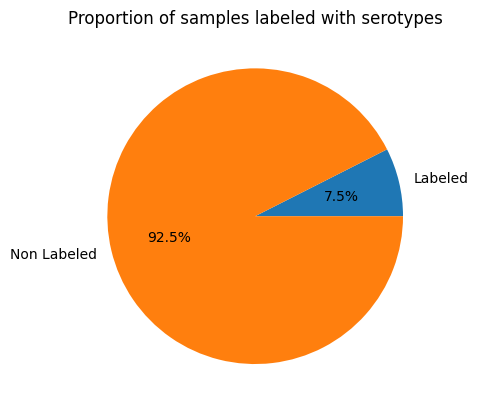

In [36]:

labels = 'Labeled', 'Non Labeled'
sizes = [labeled_length, non_labeled_length]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title("Proportion of samples labeled with serotypes")

Text(0.5, 1.0, 'Proportion of data (in format .sra) labeled with serotypes')

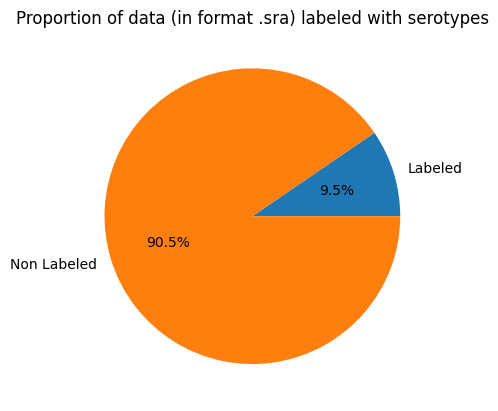

In [37]:
labels = 'Labeled', 'Non Labeled'
sizes = [sum(labeled["size_MB"]), sum(non_labeled["size_MB"])]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title("Proportion of data (in format .sra) labeled with serotypes")


Text(0.5, 1.0, 'Proportion of data labeled with each serotypes')

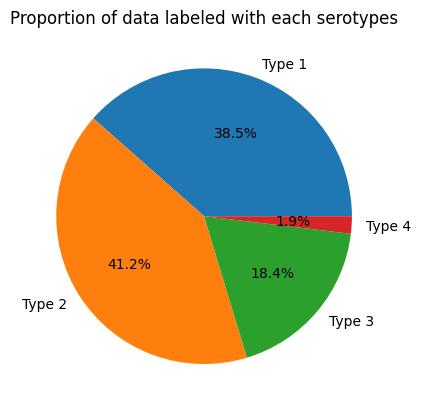

In [30]:
labels = 'Type 1', 'Type 2', 'Type 3', 'Type 4'
sizes = [type1_length, type2_length, type3_length, type4_length]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title("Proportion of samples labeled with each serotypes")

Text(0.5, 1.0, 'Proportion of data (.sra) labeled with each serotypes')

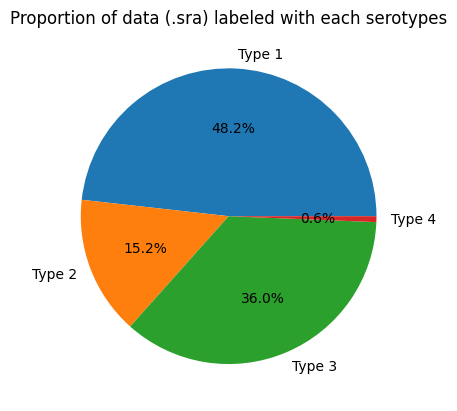

In [38]:
labels = 'Type 1', 'Type 2', 'Type 3', 'Type 4'
sizes = [sum(type1["size_MB"])/1000, sum(type2["size_MB"])/1000, sum(type3["size_MB"])/1000, sum(type4["size_MB"])/1000]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title("Proportion of data (.sra) labeled with each serotypes")

# Characterizing  the data

## Strategies (LibraryStrategy header)

Text(0.5, 1.0, 'Strategies used (whole dataset)')

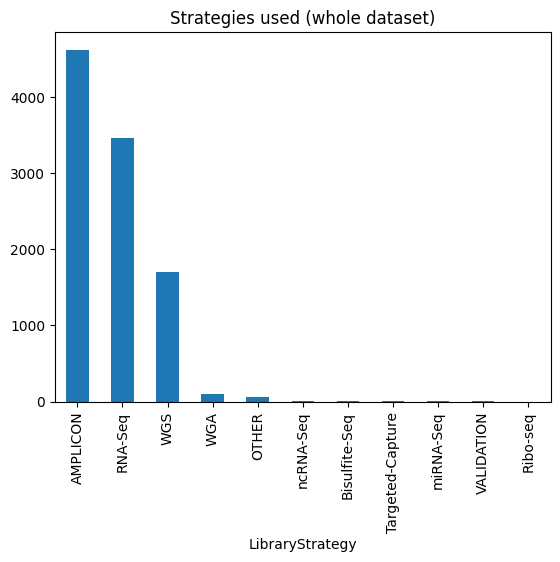

In [41]:
dataset["LibraryStrategy"].value_counts().plot(kind = 'bar')
plt.title("Strategies used (whole dataset)")

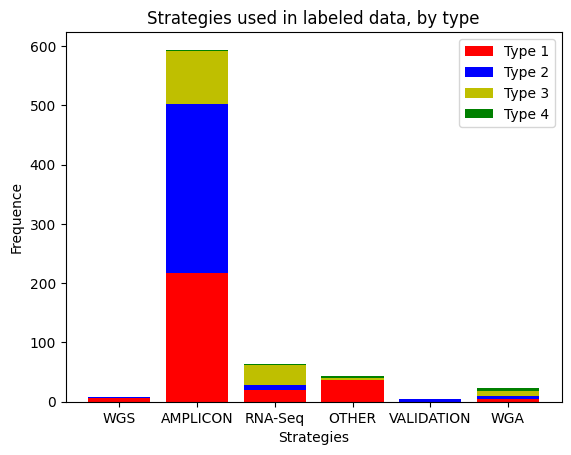

In [50]:
distinctStrategies = labeled["LibraryStrategy"].unique()
type1_strategies = np.array([type1[type1.LibraryStrategy == i].shape[0] for i in distinctStrategies])
type2_strategies = np.array([type2[type2.LibraryStrategy == i].shape[0] for i in distinctStrategies])
type3_strategies = np.array([type3[type3.LibraryStrategy == i].shape[0] for i in distinctStrategies])
type4_strategies = np.array([type4[type4.LibraryStrategy == i].shape[0] for i in distinctStrategies])

plt.bar(distinctStrategies, type1_strategies, color='r')
plt.bar(distinctStrategies, type2_strategies, bottom=type1_strategies, color='b')
plt.bar(distinctStrategies, type3_strategies, bottom=type1_strategies+type2_strategies, color='y')
plt.bar(distinctStrategies, type4_strategies, bottom=type1_strategies+type2_strategies+type3_strategies, color='g')
plt.xlabel("Strategies")
plt.ylabel("Frequence")
plt.legend(["Type 1", "Type 2", "Type 3", "Type 4"])
plt.title("Strategies used in labeled data, by type")
plt.show()


Text(0.5, 1.0, 'Strategies used (type 4 only, for visibility)')

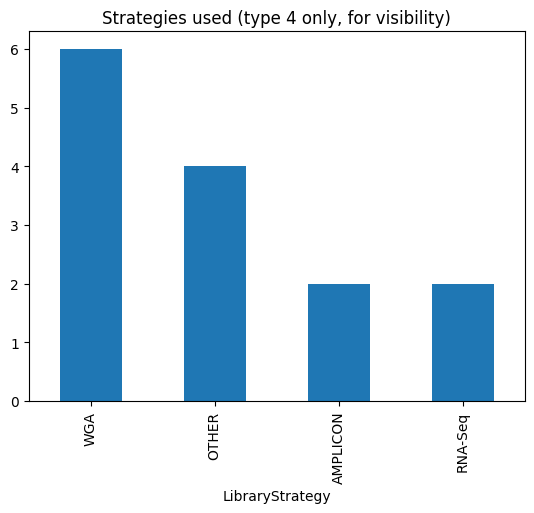

In [51]:
type4["LibraryStrategy"].value_counts().plot(kind = 'bar')
plt.title("Strategies used (type 4 only, for visibility)")

## Source (LibrarySource header)

Text(0.5, 1.0, 'Sources used (whole dataset)')

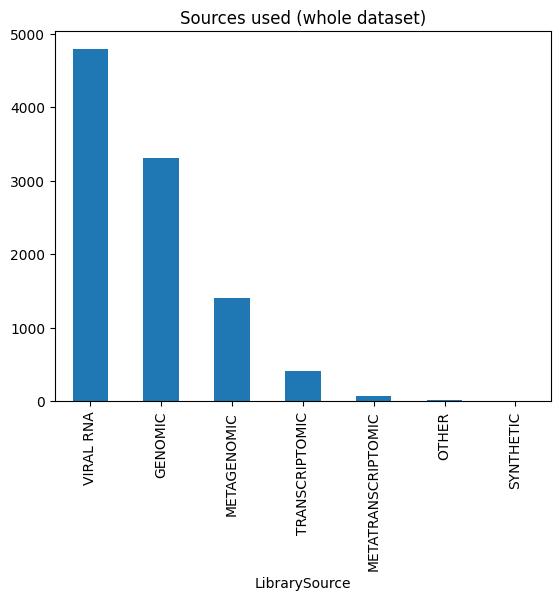

In [54]:
dataset["LibrarySource"].value_counts().plot(kind = 'bar')
plt.title("Sources used (whole dataset)")

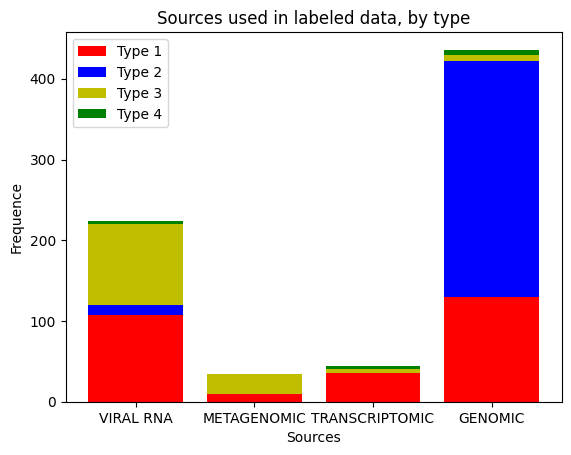

In [56]:
distinctSources = labeled["LibrarySource"].unique()
type1_sources = np.array([type1[type1.LibrarySource == i].shape[0] for i in distinctSources])
type2_sources = np.array([type2[type2.LibrarySource == i].shape[0] for i in distinctSources])
type3_sources = np.array([type3[type3.LibrarySource == i].shape[0] for i in distinctSources])
type4_sources = np.array([type4[type4.LibrarySource == i].shape[0] for i in distinctSources])

plt.bar(distinctSources, type1_sources, color='r')
plt.bar(distinctSources, type2_sources, bottom=type1_sources, color='b')
plt.bar(distinctSources, type3_sources, bottom=type1_sources+type2_sources, color='y')
plt.bar(distinctSources, type4_sources, bottom=type1_sources + type2_sources+type3_sources, color='g')
plt.xlabel("Sources")
plt.ylabel("Frequence")
plt.legend(["Type 1", "Type 2", "Type 3", "Type 4"])
plt.title("Sources used in labeled data, by type")
plt.show()

Text(0.5, 1.0, 'Sources used (type 4 only, for visibility)')

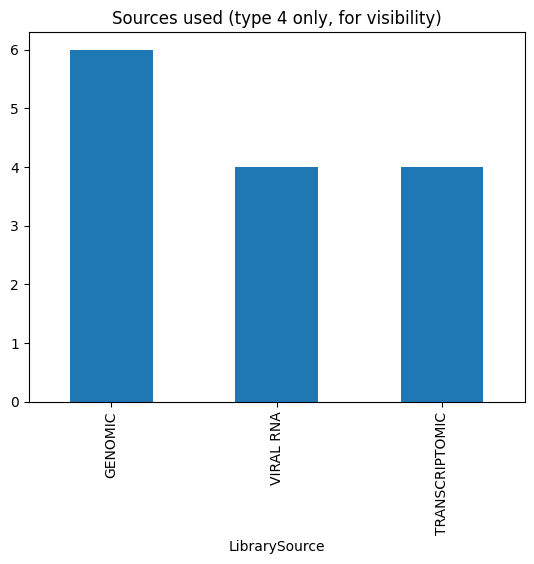

In [58]:
type4["LibrarySource"].value_counts().plot(kind = 'bar')
plt.title("Sources used (type 4 only, for visibility)")

## Selection (LibrarySelection header)

Text(0.5, 1.0, 'Selections used (whole dataset)')

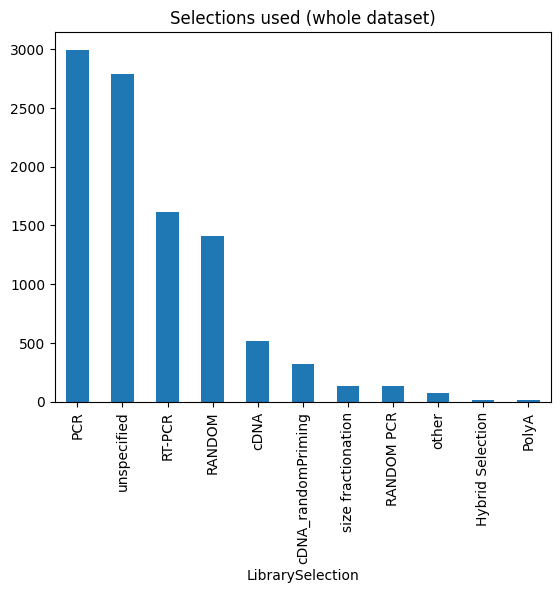

In [59]:
dataset["LibrarySelection"].value_counts().plot(kind = 'bar')
plt.title("Selections used (whole dataset)")

484


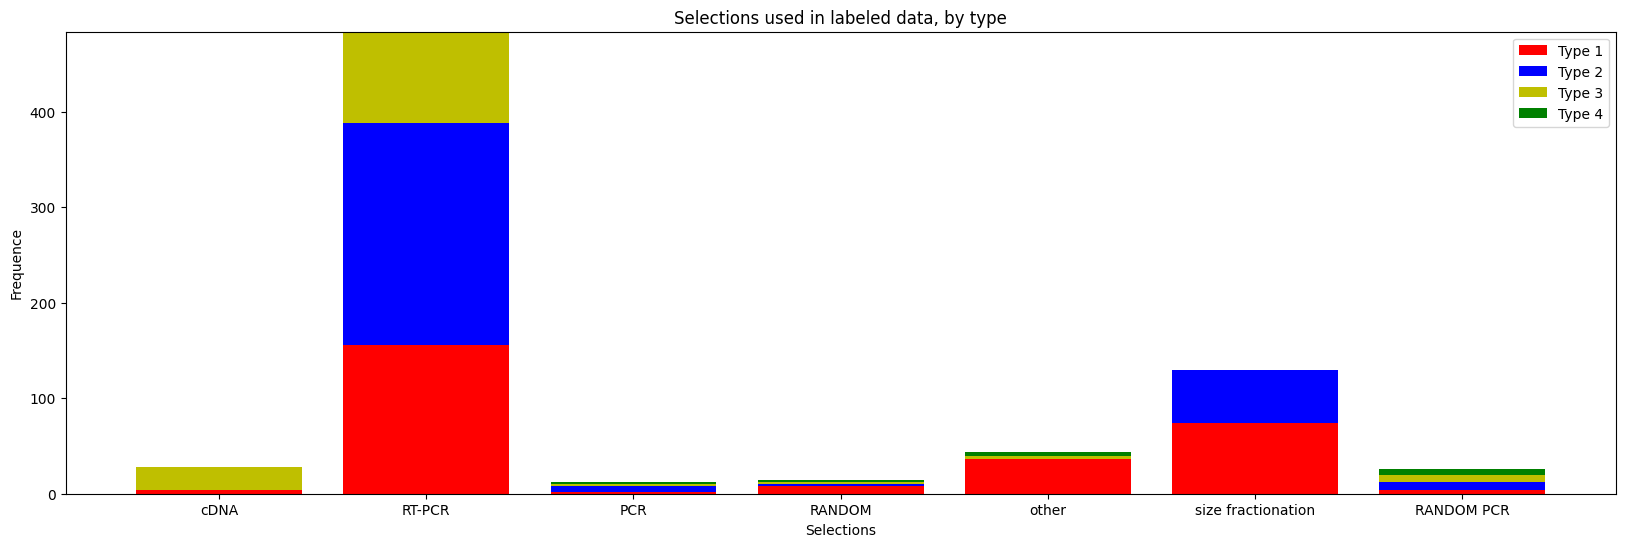

In [ ]:
distinctSelections = labeled["LibrarySelection"].unique()
type1_selections = np.array([type1[type1.LibrarySelection == i].shape[0] for i in distinctSelections])
type2_selections = np.array([type2[type2.LibrarySelection == i].shape[0] for i in distinctSelections])
type3_selections = np.array([type3[type3.LibrarySelection == i].shape[0] for i in distinctSelections])
type4_selections = np.array([type4[type4.LibrarySelection == i].shape[0] for i in distinctSelections])

plt.figure(figsize=(20, 6))
plt.bar(distinctSelections, type1_selections, color='r')
plt.bar(distinctSelections, type2_selections, bottom=type1_selections, color='b')
plt.bar(distinctSelections, type3_selections, bottom=type1_selections + type2_selections, color='y')
plt.bar(distinctSelections, type4_selections, bottom=type1_selections + type2_selections + type3_selections, color='g')
plt.xlabel("Selections")
plt.ylabel("Frequence")
plt.legend(["Type 1", "Type 2", "Type 3", "Type 4"])
plt.title("Selections used in labeled data, by type")
plt.show()

Text(0.5, 1.0, 'Selections used (type 4 only for visibility)')

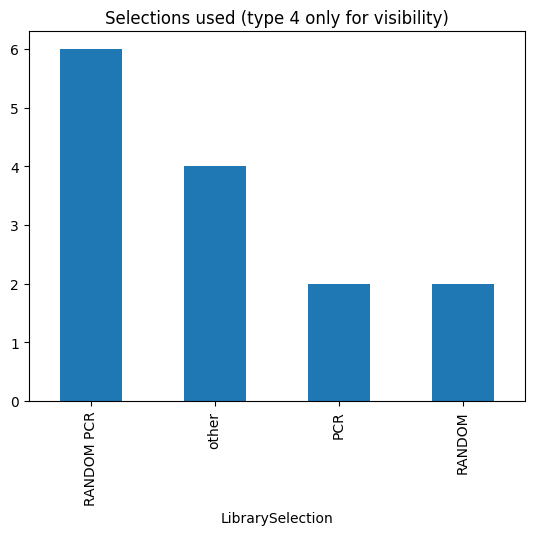

In [66]:
type4["LibrarySelection"].value_counts().plot(kind = 'bar')
plt.title("Selections used (type 4 only for visibility)")

## Models of the sequencers (Model header)

Text(0.5, 1.0, 'Models used (whole dataset)')

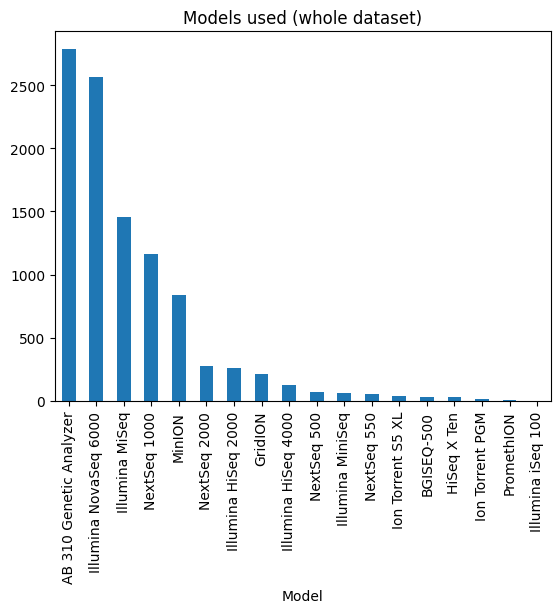

In [70]:
dataset["Model"].value_counts().plot(kind = 'bar')
plt.title("Models used (whole dataset)")

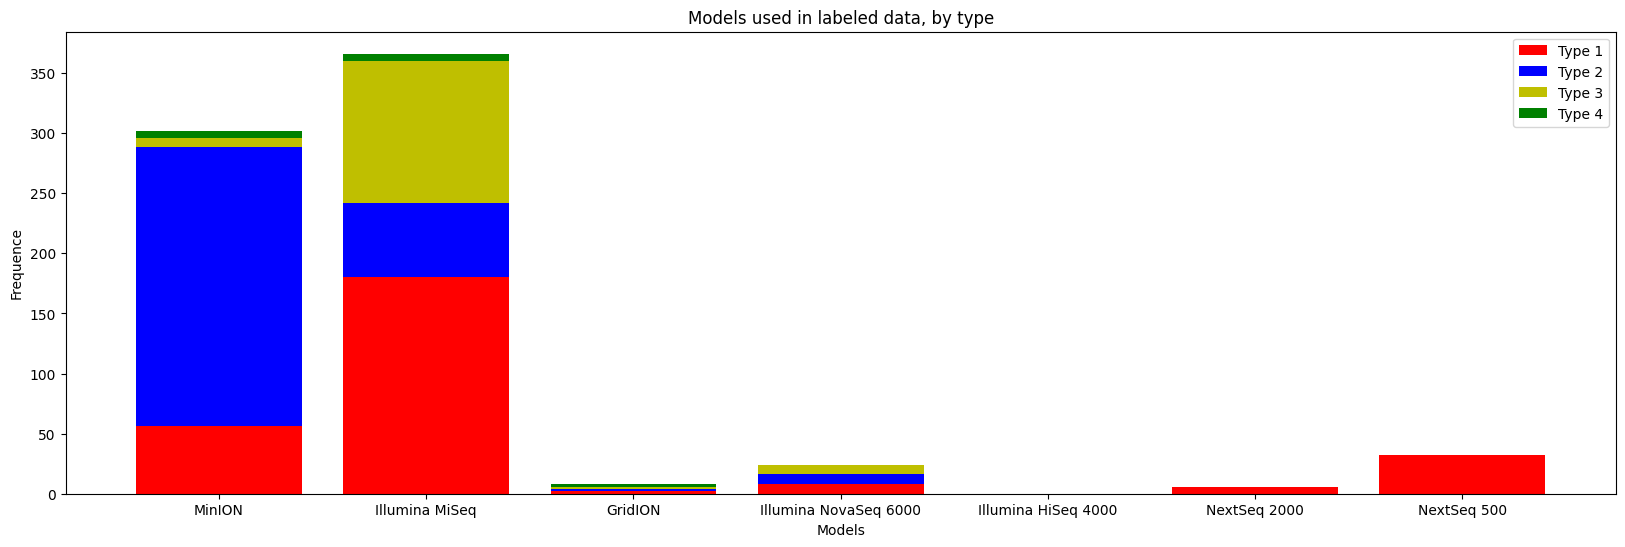

In [71]:
distinctModels = labeled["Model"].unique()
type1_models = np.array([type1[type1.Model == i].shape[0] for i in distinctModels])
type2_models = np.array([type2[type2.Model == i].shape[0] for i in distinctModels])
type3_models = np.array([type3[type3.Model == i].shape[0] for i in distinctModels])
type4_models = np.array([type4[type4.Model == i].shape[0] for i in distinctModels])

plt.figure(figsize=(20, 6))
plt.bar(distinctModels, type1_models, color='r')
plt.bar(distinctModels, type2_models, bottom=type1_models, color='b')
plt.bar(distinctModels, type3_models, bottom=type1_models + type2_models, color='y')
plt.bar(distinctModels, type4_models, bottom=type1_models + type2_models + type3_models, color='g')
plt.xlabel("Models")
plt.ylabel("Frequence")
plt.legend(["Type 1", "Type 2", "Type 3", "Type 4"])
plt.title("Models used in labeled data, by type")
plt.show()

Text(0.5, 1.0, 'Models used (type 4 only, for visibility)')

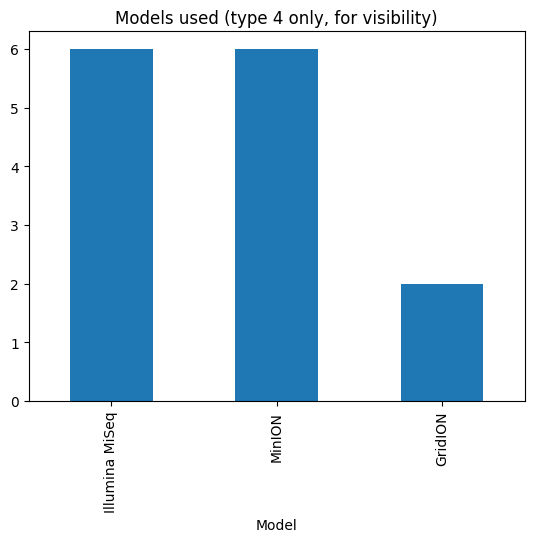

In [72]:
type4["Model"].value_counts().plot(kind = 'bar')
plt.title("Models used (type 4 only, for visibility)")

In [52]:
dataset["Model"].unique()

array(['Ion Torrent PGM', 'MinION', 'HiSeq X Ten', 'NextSeq 550',
       'Illumina MiniSeq', 'Illumina NovaSeq 6000', 'NextSeq 500',
       'AB 310 Genetic Analyzer', 'Illumina MiSeq', 'NextSeq 1000',
       'Illumina iSeq 100', 'Illumina HiSeq 2000', 'Illumina HiSeq 4000',
       'GridION', 'PromethION', 'NextSeq 2000', 'Ion Torrent S5 XL',
       'BGISEQ-500'], dtype=object)